# CPS 840 / CP 8318 Assignment 2
## CPS 840 [30 Marks]
## CP 8318 [36 Marks]

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')
trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

In [1]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

NameError: name 'x_training' is not defined

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

(12045, 7)
(12045, 48, 48)
(667, 7)
(667, 48, 48)


/anaconda3/envs/pytorch2/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/anaconda3/envs/pytorch2/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


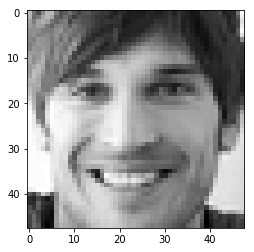

facial emotion: happy


In [6]:
# YOUR CODE HERE

hs_y_training = y_training
hs_x_training = x_training
delete = []


# Sample training data
for i in reversed(range(len(y_training))):
    if hs_y_training[i,3] == 0 and hs_y_training[i,4] == 0:
        delete.append(i)
hs_y_training = np.delete(hs_y_training, delete, 0)    
hs_x_training = np.delete(hs_x_training, delete, 0)


# Sample testing data
hs_y_testing = y_testing
hs_x_testing = x_testing
delete_test = []

for i in reversed(range(len(y_testing))):
    if hs_y_testing[i,3] == 0 and hs_y_testing[i,4] == 0:
        delete.append(i)
hs_y_testing = np.delete(hs_y_testing, delete, 0)    
hs_x_testing = np.delete(hs_x_testing, delete, 0)

reshape_x_testing = x_testing.reshape((3589, 48*48))
reshape_hs_x_testing = hs_x_testing.reshape((667, 48*48))
label_hs_y_testing = np.zeros((667,))

for i in range(len(hs_y_testing)):
    if hs_y_testing[i,3] == 1:
        label_hs_y_testing[i] = 0
    elif hs_y_testing[i,4] == 1:
        label_hs_y_testing[i] = 1


# Sanity check
print(hs_y_testing.shape)
print(hs_x_testing.shape)

sampleindex2 = np.random.randint(0,667)
sample2 = hs_x_testing[sampleindex2, :]
sample2 = sample2.reshape(48, 48)

plt.imshow(sample2, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(hs_y_testing[sampleindex2, :]))

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

Text(0,0.5,'component 2')

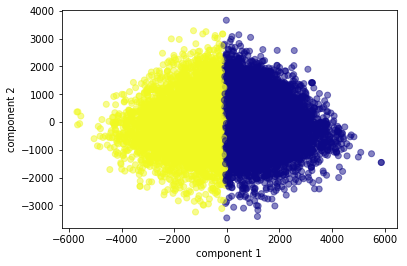

In [7]:
# YOUR CODE HERE
#PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

hs_x_training_2d = hs_x_training.reshape((12045, 48*48))
n_clusters = 2
k_hs = KMeans(n_clusters)
k_hs.fit(hs_x_training_2d)
hs_labels = k_hs.predict(hs_x_training_2d)

n_components = 16
pca = PCA(n_components)

pca.fit(hs_x_training_2d)

proj_hs = pca.transform(hs_x_training_2d)
proj_hs_testing = pca.transform(hs_x_testing.reshape((667, 48*48)))

plt.scatter(proj_hs[:,0], proj_hs[:,1], c=hs_labels, cmap='plasma' ,alpha = 0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')



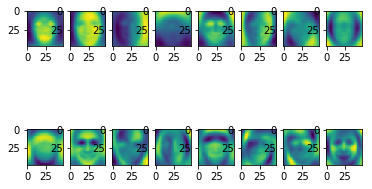

In [103]:
#Eigenfaces
eigenfaces = pca.components_.reshape((n_components, 48, 48))

f, axarr = plt.subplots(2,8)
axarr[0,0].imshow(eigenfaces[0])
axarr[0,1].imshow(eigenfaces[1])
axarr[0,2].imshow(eigenfaces[2])
axarr[0,3].imshow(eigenfaces[3])
axarr[0,4].imshow(eigenfaces[4])
axarr[0,5].imshow(eigenfaces[5])
axarr[0,6].imshow(eigenfaces[6])
axarr[0,7].imshow(eigenfaces[7])
axarr[1,0].imshow(eigenfaces[8])
axarr[1,1].imshow(eigenfaces[9])
axarr[1,2].imshow(eigenfaces[10])
axarr[1,3].imshow(eigenfaces[11])
axarr[1,4].imshow(eigenfaces[12])
axarr[1,5].imshow(eigenfaces[13])
axarr[1,6].imshow(eigenfaces[14])
axarr[1,7].imshow(eigenfaces[15])

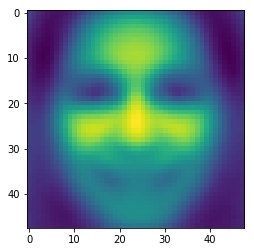

In [9]:
# LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_n_components = 1
lda = LinearDiscriminantAnalysis(n_components = lda_n_components)
label_hs_y_training = np.zeros((12045,))

#Numbering from one-hot encoding
for i in range(len(hs_y_training)):
    if hs_y_training[i,3] == 1:
        label_hs_y_training[i] = 0
    elif hs_y_training[i,4] == 1:
        label_hs_y_training[i] = 1

pca_2 = PCA(n_components = 64)
pca_2.fit(hs_x_training_2d)
pca_trans = pca_2.transform(hs_x_training_2d)

lda.fit(pca_trans, label_hs_y_training)
ldax = lda.transform(pca_trans)

fisherfaces = pca_2.inverse_transform(lda.scalings_[:,0])
fisherfaces = fisherfaces.reshape((48,48))

f, axarr = plt.subplots(1,1)
axarr.imshow(fisherfaces)

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [10]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(hs_x_training_2d, label_hs_y_training)
gnb_score = gnb.score(reshape_hs_x_testing, label_hs_y_testing)
print('The score for naive Bayes is:' , gnb_score)

The score for naive Bayes is: 0.6041979010494752


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [11]:
# YOUR CODE HERE
#Logistic regression done on the PCA - data
from sklearn.linear_model import LogisticRegression as LR
clf = LR()
clf.fit(proj_hs, label_hs_y_training)
log_reg_score = clf.score(proj_hs_testing, label_hs_y_testing)
print('The score for logistic regression is:' , log_reg_score)

The score for logistic regression is: 0.6266866566716641


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [12]:
# YOUR CODE HERE
from sklearn import svm
svm1 = svm.SVC()
svm1.fit(proj_hs, label_hs_y_training)
svm1_score = svm1.score(proj_hs_testing, label_hs_y_testing)
print('The score for SVM1 is:' , svm1_score)

The score for SVM1 is: 0.5982008995502249


In [13]:
svm2 = svm.SVC(C=10, kernel='sigmoid')
svm2.fit(proj_hs, label_hs_y_training)
svm2_score = svm2.score(proj_hs_testing, label_hs_y_testing)
print('The score for SVM2 is:' , svm2_score)

The score for SVM2 is: 0.5022488755622189


In [14]:
svm3 = svm.SVC(gamma = 0.001)
svm3.fit(proj_hs, label_hs_y_training)
svm3_score = svm3.score(proj_hs_testing, label_hs_y_testing)
print('The score for SVM3 is:' , svm3_score)

The score for SVM3 is: 0.5982008995502249


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

SVM would capture the degree as the distance of the example to the hyperplane. Logisic regression also could capture it in terms of the distance from the example to the approximating function.

I would trust logistic regression the most as it had the highest accuracy but SVM appears to return better qualitative results in terms of the 5 happiest and saddest faces. 

YOUR ANSWER HERE

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

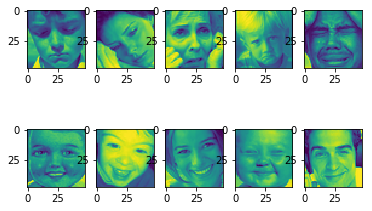

In [202]:
# YOUR CODE HERE
#Top 5 happiest and saddest faces
happiest_saddest = svm1.decision_function(proj_hs_testing)
temp_happiest_saddest = happiest_saddest
saddest = []
for i in range(5):
    sad = np.argmax(happiest_saddest)
    saddest.append(sad)
    temp_happiest_saddest[sad] = 0
    
happiest = []
for i in range(5):
    happy = np.argmin(happiest_saddest)
    happiest.append(happy)
    temp_happiest_saddest[happy] = 0
    

h, axarr4 = plt.subplots(2,5)
axarr4[0,0].imshow(hs_x_testing[saddest[0]])
axarr4[0,1].imshow(hs_x_testing[saddest[1]])
axarr4[0,2].imshow(hs_x_testing[saddest[2]])
axarr4[0,3].imshow(hs_x_testing[saddest[3]])
axarr4[0,4].imshow(hs_x_testing[saddest[4]])
axarr4[1,0].imshow(hs_x_testing[happiest[0]])
axarr4[1,1].imshow(hs_x_testing[happiest[1]])
axarr4[1,2].imshow(hs_x_testing[happiest[2]])
axarr4[1,3].imshow(hs_x_testing[happiest[3]])
axarr4[1,4].imshow(hs_x_testing[happiest[4]])

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [62]:
# YOUR CODE HERE
x_training_2d = x_training.reshape((28709, 48*48))

n_components2 = 64
pca2 = PCA(n_components2)
pca2.fit(x_training_2d)
proj = pca2.transform(x_training_2d)

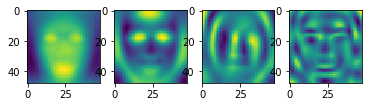

In [63]:
#Eigenfaces
eigenfaces2 = pca2.components_.reshape((n_components2, 48, 48))

g, axarr2 = plt.subplots(1,4)
axarr2[0].imshow(eigenfaces2[0])
axarr2[1].imshow(eigenfaces2[14])
axarr2[2].imshow(eigenfaces2[30])
axarr2[3].imshow(eigenfaces2[63])

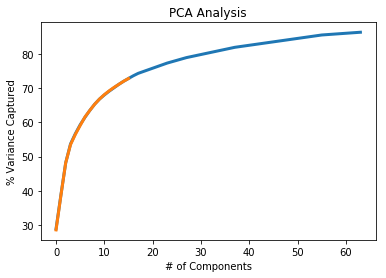

In [201]:
#Showing cumulative variance

variance = pca2.explained_variance_ratio_
var = np.cumsum(np.round(pca2.explained_variance_ratio_, decimals=3)*100)

variance_hs = pca.explained_variance_ratio_
var_hs = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)


plt.ylabel('% Variance Captured')
plt.xlabel('# of Components')
plt.title('PCA Analysis')
#plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var, linewidth=3.0)
plt.plot(var_hs, linewidth=3.0)

In [65]:
#Reshaping and classifying data numerically
num_y_training = np.zeros((28709,))

for i in range(len(y_training)):
    if y_training[i,0] == 1:
        num_y_training[i] = 0
    elif y_training[i,1] == 1:
        num_y_training[i] = 1
    elif y_training[i,2] == 1:
        num_y_training[i] = 2
    elif y_training[i,3] == 1:
        num_y_training[i] = 3
    elif y_training[i,4] == 1:
        num_y_training[i] = 4
    elif y_training[i,5] == 1:
        num_y_training[i] = 5
    elif y_training[i,6] == 1:
        num_y_training[i] = 6
        
        
num_y_testing = np.zeros((3589,))

for i in range(len(y_testing)):
    if y_testing[i,0] == 1:
        num_y_testing[i] = 0
    elif y_testing[i,1] == 1:
        num_y_testing[i] = 1
    elif y_testing[i,2] == 1:
        num_y_testing[i] = 2
    elif y_testing[i,3] == 1:
        num_y_testing[i] = 3
    elif y_testing[i,4] == 1:
        num_y_testing[i] = 4
    elif y_testing[i,5] == 1:
        num_y_testing[i] = 5
    elif y_testing[i,6] == 1:
        num_y_testing[i] = 6

proj_x_testing = pca2.transform(reshape_x_testing)

/anaconda3/envs/pytorch2/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


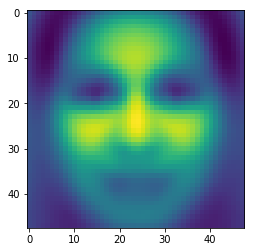

In [66]:
#LDA
lda_n_components2 = 1
lda2 = LinearDiscriminantAnalysis(n_components = lda_n_components)

pca3 = PCA(n_components = 64)
pca3.fit(x_training_2d)
pca_trans2 = pca3.transform(x_training_2d)

lda2.fit(pca_trans2, num_y_training)
ldax2 = lda2.transform(pca_trans)

fisherfaces2 = pca3.inverse_transform(lda2.scalings_[:,0])
fisherfaces2 = fisherfaces2.reshape((48,48))

h, axarr3 = plt.subplots(1,1)
axarr3.imshow(fisherfaces2)


[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [33]:
# YOUR CODE HERE
gnb2 = GaussianNB()
gnb2.fit(x_training_2d, num_y_training)
gnb_score2 = gnb2.score(reshape_x_testing, num_y_testing)
print('The score for naive Bayes is:' , gnb_score2)

The score for naive Bayes is: 0.22736138200055725


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

Naive Bayes uses a one vs all approach which computes a class probability for each pixel. Therefore every pixel for each inut example has 7 probabilities associated with it with the final class being the overall probability of all the pixels for each individual example. 

In [34]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
GNB_pred = gnb2.predict(reshape_x_testing)
cmatrix = confusion_matrix(num_y_testing, GNB_pred)
print(cmatrix)

[[ 20  51  29  50 136 139  42]
 [  2  12   2   4  14  18   4]
 [ 21  36  33  30 116 213  47]
 [ 21 103  25 143 212 271 120]
 [ 33  66  31  63 257 139  64]
 [ 15  30  12  22  43 253  40]
 [ 17  62  23  52 174 181  98]]


The emotions are in order: 
0: angry
1: disgust
2: fear
3: happy
4: sad
5: surprise
6: neutral

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [67]:
# YOUR CODE HERE
#Logistic regression
clf2 = LR()
clf2.fit(proj, num_y_training)
log_reg_score2 = clf2.score(proj_x_testing, num_y_testing)
print('The score for logistic regression is:' , log_reg_score2)

The score for logistic regression is: 0.37921426581220397


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

The multi-class nature is treated by using a one vs one approach. It calculates C(C-1)/2 classifiers and compares them for each prediction.

In [68]:
# YOUR CODE HERE
log_reg_pred = clf2.predict(proj_x_testing)
cmatrix2 = confusion_matrix(num_y_testing, log_reg_pred)
print(cmatrix2)
#unique, counts = np.unique(num_y_testing, return_counts=True)
#print(dict(zip(unique, counts)))

[[ 41   0  23 215  78  42  68]
 [  4   0   5  30   7   3   7]
 [ 25   0  40 182  73  74 102]
 [ 19   0  19 665  86  37  69]
 [ 50   0  29 208 212  36 118]
 [ 15   0  22  82  42 200  54]
 [ 28   0  18 227  87  44 203]]


[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [75]:
# YOUR CODE HERE
from sklearn.svm import LinearSVC
svm_faces = svm.LinearSVC()
svm_faces.fit(proj, num_y_training)
svm_faces_score = svm_faces.score(proj_x_testing, num_y_testing)
print('The score for SVM is:' , svm_faces_score)

The score for SVM is: 0.24017832265254946


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

The SVM optimizes an n-1 dimensional hyperplane to separate all examples. This means that there is a 6 dimensional hyperplane which has 7 sides which include a single class -> aka one side is happy, one side is sad... The degree of confidence is measured by how far away each example is to the hyperplane. The classifier does this by using a one vs one approach: training C(C-1)/2 different binary classifiers (7(7-1)/2 = 21).

In [76]:
SVM_pred = svm_faces.predict(proj_x_testing)
cmatrix3 = confusion_matrix(num_y_testing, SVM_pred)
print(cmatrix3)
#unique, counts = np.unique(num_y_testing, return_counts=True)
#print(dict(zip(unique, counts)))

[[ 29   1  46 155  70  39 127]
 [  0   0   2  21   6   4  23]
 [ 33   3  37 144  75  77 127]
 [ 60   1 118 361  86  53 216]
 [ 31   1  69 147 100  56 249]
 [ 23   1  45 109  52 113  72]
 [ 29   0  94 146  76  40 222]]


[2 Marks] e. Which categories of faces seem to be most similar or least similar?

Similar:
Sad - Neutral (249 Sad's were predicted as Neutral's in the svm case and 118 in the log reg case)
Happy - Neutral (216 Happy's were predicted as Neutral's and 146 Neutrals were predicted as Happy's for svm and 120 Happy's were predicted as Neutral's in the GNB case)
Fear - Happy (many fears were predicted as happy in the SVM and Log Reg case)

Least Similar:
Disgust was Not similar to any other faces really



[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

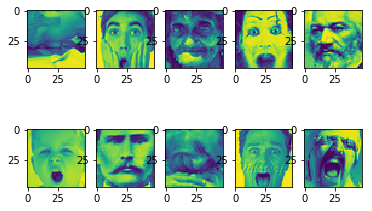

In [199]:
# YOUR CODE HERE
#High confidence example that is guessed incorrectly (using log reg due to higher accuracy)
confidence = clf2.decision_function(proj_x_testing)

temp_confidence = []
for i in range(len(confidence)):
    temp_confidence.append(np.max(confidence[i]))
    
high_confidence = []
x_pred_log = clf2.predict(proj_x_testing)
incorrect_index = np.zeros((3589,))

for j in range(len(num_y_testing)):
    if x_pred_log[j] != num_y_testing[j]:
        incorrect_index[j] = 1

#Incorrect index is a array of all labels that were incorrectly predicted
#by the log-reg classifier. I will now choose the ten most confident predictions
#out of the incorrect guesses to be the 10 mislabeled.

incorrect_index_nonzero = []
for i in range(len(incorrect_index)):
    if incorrect_index[i] == 1:
        incorrect_index_nonzero.append(i)
        
incorrect_confidences = []
for i in incorrect_index_nonzero:
    incorrect_confidences.append(temp_confidence[i])
    
#Incorrect confidences -> confidences of incorrect values
#Incorrrect_index_nonzero -> indices of these confidences

incorrect = []
for i in range(10):
    x = np.argmax(incorrect_confidences)
    incorrect.append(incorrect_index_nonzero[x])
    incorrect_confidences[x] = 0

   
h, axarr4 = plt.subplots(2,5)
axarr4[0,0].imshow(x_testing[incorrect[0]])
axarr4[0,1].imshow(x_testing[incorrect[1]])
axarr4[0,2].imshow(x_testing[incorrect[2]])
axarr4[0,3].imshow(x_testing[incorrect[3]])
axarr4[0,4].imshow(x_testing[incorrect[4]])
axarr4[1,0].imshow(x_testing[incorrect[5]])
axarr4[1,1].imshow(x_testing[incorrect[6]])
axarr4[1,2].imshow(x_testing[incorrect[7]])
axarr4[1,3].imshow(x_testing[incorrect[8]])
axarr4[1,4].imshow(x_testing[incorrect[9]])


# 8318 only

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[6 Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [204]:
# YOUR CODE HERE
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne_result = tsne.fit_transform(clf2.predict_proba(proj_x_testing))
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [205]:
from sklearn.preprocessing import StandardScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


def visualize_scatter_with_images(X_2d_data, images, figsize=(48,48), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()


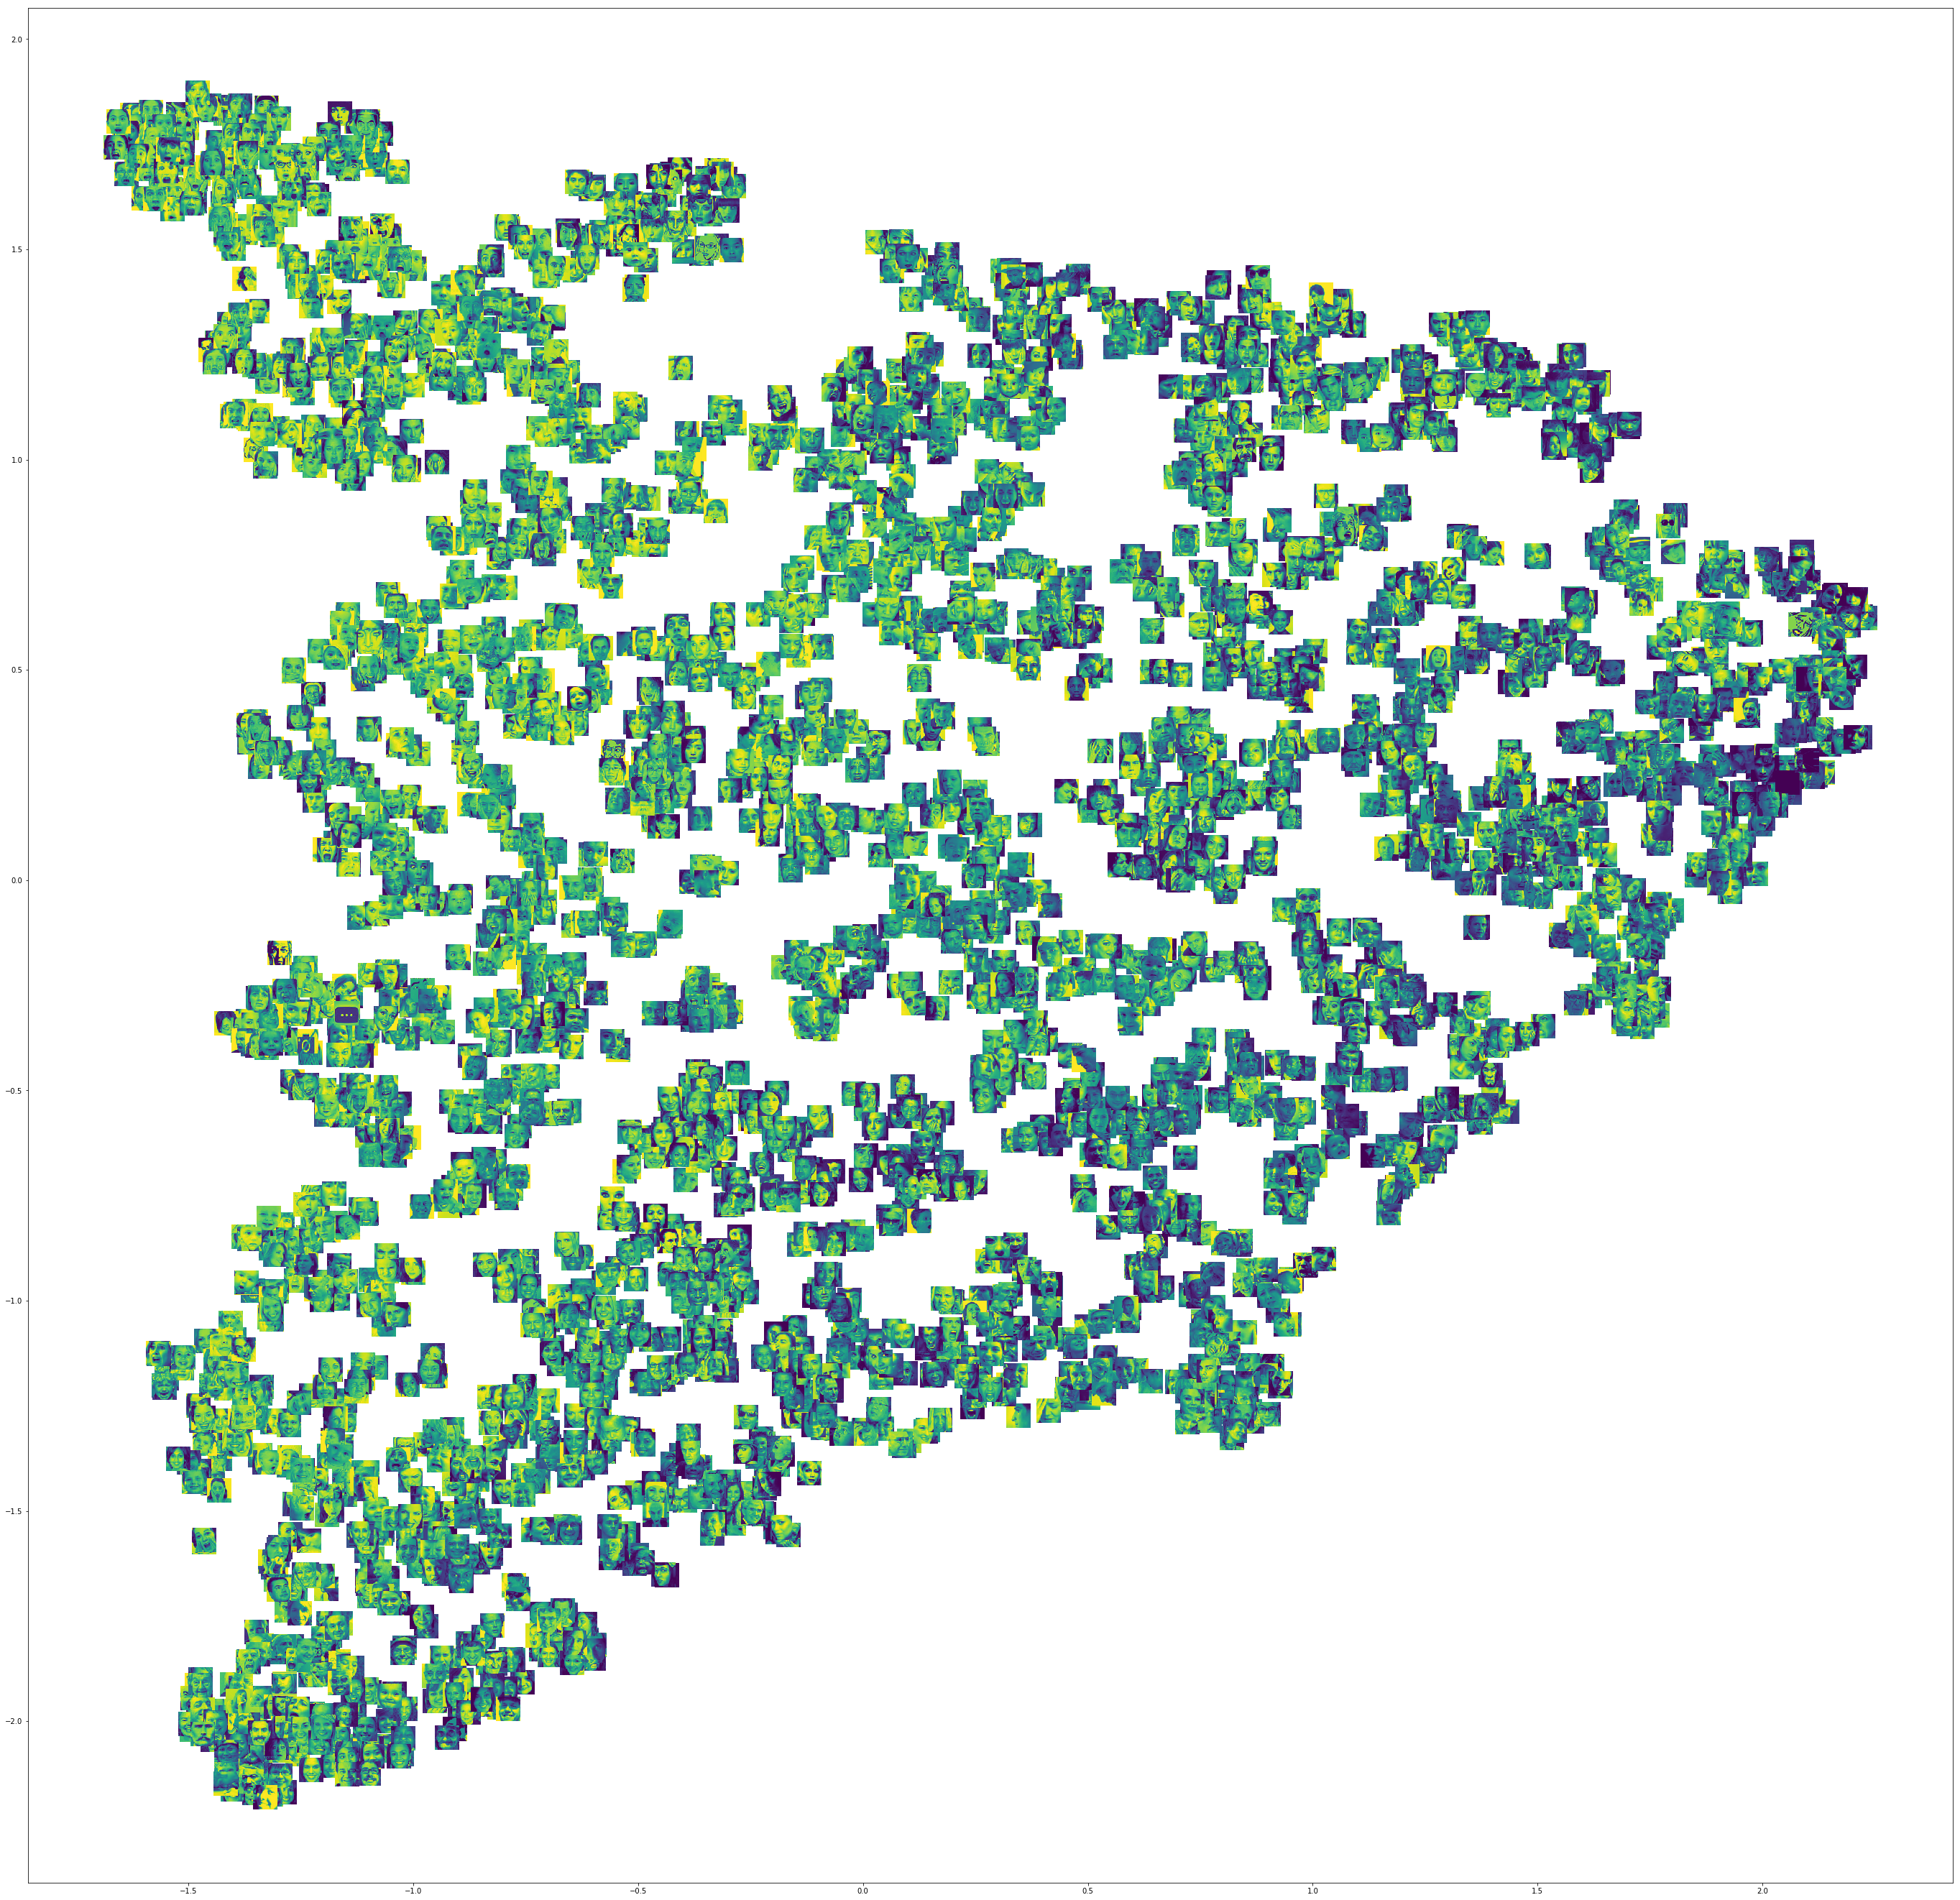

In [206]:
visualize_scatter_with_images(tsne_result_scaled, images = x_testing, image_zoom=0.7)